In [1]:
import tweepy
import pandas as pd

In [2]:
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAEkYWAEAAAAAiCZ95QEqxNKuluivi0dNKwu%2BUIA%3DpXPhzD5xrJFlCx6roDUnzjJ6jtuh8wr2AyPhfZls4g4Yo4kH8y"
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [3]:
# query = '#racunshopee OR "racun shopee" OR "shopee haul" OR #shopeehaul lang:id'
# query = '("rekomendasi" OR "referensi" OR "inspirasi") ("outfit" OR "baju" OR "OOTD")'
query = 'eiger lang:id'

start_time = "2022-03-11T00:00:00Z"
end_time = "2022-03-16T23:59:00Z"

In [4]:
tweets_data = []
tweets_user = []

for response in tweepy.Paginator(client.search_recent_tweets,
                                query=query,
                                # start_time=start_time,
                                # end_time=end_time,
                                tweet_fields = ["created_at", "text", "author_id", "entities", "in_reply_to_user_id"],
                                user_fields = ["name", "username", "location", "verified", "description"],
                                max_results = 100,
                                expansions='author_id', limit=100):
  
    tweets_data += response.data
    tweets_user += response.includes["users"]

In [5]:
tweets_data_df = pd.DataFrame(tweets_data)
tweets_user_df = pd.DataFrame(tweets_user)
# tweets_data_df.to_csv('tweets_data.csv')
# tweets_user_df.to_csv('tweets_user.csv')

In [6]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   author_id            324 non-null    int64              
 1   created_at           324 non-null    datetime64[ns, UTC]
 2   entities             274 non-null    object             
 3   id                   324 non-null    int64              
 4   in_reply_to_user_id  142 non-null    float64            
 5   text                 324 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 15.3+ KB


In [7]:
tweets_user_df_rename = tweets_user_df.rename(columns={"id": "author_id"})

In [8]:
tweets_user_df_nodups = tweets_user_df_rename.drop_duplicates()
# tweets_user_df_nodups = tweets_user_df_rename

In [9]:
df = tweets_data_df.merge(tweets_user_df_nodups, left_on='author_id', right_on='author_id')

In [10]:
tweets_data_df

,author_id,created_at,entities,id,in_reply_to_user_id,text
0,44085733,2022-05-22 07:39:28+00:00,NaN,1528279363317207040,NaN,Sekilas info barang2 Osprey di Eiger Adventure...
1,769813653927239680,2022-05-22 06:30:44+00:00,"{'urls': [{'start': 113, 'end': 136, 'url': 'h...",1528262062283300865,NaN,RT @Produklokalan_: Rekomendasi Outfit Pendaki...
2,260351000,2022-05-22 06:26:47+00:00,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",1528261071278317569,NaN,"RT @eigeradventure: Yuk, siapkan outfit terbai..."
3,67260968,2022-05-22 06:23:24+00:00,"{'urls': [{'start': 272, 'end': 295, 'url': 'h...",1528260219834273792,NaN,"Yuk, siapkan outfit terbaik kamu dari EIGER 19..."
4,729210149642993665,2022-05-22 06:15:33+00:00,"{'mentions': [{'start': 0, 'end': 8, 'username...",1528258243180785664,1.152437e+18,@sbyfess cowok gw pake eiger
...,...,...,...,...,...,...
319,1296306182844424194,2022-05-15 11:58:10+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1525807752282394629,3.839452e+07,@AdjieSanPutro @andienaisyah Aku pake sendal g...
320,73327619,2022-05-15 11:34:36+00:00,"{'urls': [{'start': 113, 'end': 136, 'url': 'h...",1525801819154239488,NaN,Sendal Eiger ay udh 6 tahun menembus ragam lan...
321,127504394,2022-05-15 10:15:29+00:00,NaN,1525781907425796096,NaN,"Team sendal jepit, kalian beli merk apa? Pyopp..."
322,2813544630,2022-05-15 09:59:22+00:00,"{'urls': [{'start': 103, 'end': 126, 'url': 'h...",1525777851835789312,NaN,Cek EIGER X-SHOPEE AMBITIONTROPIC X28 SHIRT OL...


In [11]:
in_reply_to_user_df = df[df['in_reply_to_user_id'].notna()]
# in_reply_to_user_df = in_reply_to_user_df.rename(columns={"username": "source"})
in_reply_to_user_df = in_reply_to_user_df.merge(tweets_user_df_nodups, left_on='in_reply_to_user_id', right_on='author_id')
in_reply_to_user_df = in_reply_to_user_df.rename(columns={"username_x": "source","username_y": "target"})
in_reply_to_user_df = in_reply_to_user_df[["source", "target"]]
in_reply_to_user_df

,source,target
0,akuayuta,hallo_dek
1,hallo_dek,akuayuta
2,bumilautlangit,bumilautlangit
3,satriaDNgrh,eigeradventure
4,eigeradventure,eigeradventure
5,ipoel82,eigeradventure
6,SuroBoeldog,eigeradventure
7,CebongDungu15,SiPeNutur
8,SiPeNutur,SiPeNutur
9,snowglitters_,darjofess


In [14]:
tweets_data

[<Tweet id=1528279363317207040 text='Sekilas info barang2 Osprey di Eiger Adventure diskon 20%-30% meskipun di tag ga ditulis, pas di kasir diskon. Mayan'>,
 <Tweet id=1528262062283300865 text='RT @Produklokalan_: Rekomendasi Outfit Pendakian Gunung Eiger 🔥\n\nGasskuyy Yang Mau Mendaki Gunung 🔥🔥\n\n-A Thread- https://t.co/M41utOpzfU'>,
 <Tweet id=1528261071278317569 text='RT @eigeradventure: Yuk, siapkan outfit terbaik kamu dari EIGER 1989, mulai dari t-shirt, celana, topi, dan sepatu bergaya kasual dan tentu…'>,
 <Tweet id=1528260219834273792 text='Yuk, siapkan outfit terbaik kamu dari EIGER 1989, mulai dari t-shirt, celana, topi, dan sepatu bergaya kasual dan tentunya nyaman dipakai saat bersantai.\n\nFollow @eigeradventure buat update produk terbaru dari EIGER ya!\n\n#EigerAdventure #EigerTropicalAdventure #Lifestyle https://t.co/2mMbttzRrU'>,
 <Tweet id=1528258243180785664 text='@sbyfess cowok gw pake eiger'>,
 <Tweet id=1528258183026085888 text='kokohan carabiner calibre atau eige

In [12]:
mentions = []
for i in tweets_data:
  if(i["entities"] is not None):
    if "mentions" in i["entities"]:
      for j in i["entities"]["mentions"]:
        print(j["id"], j["username"], i["id"])
        mention = {
          "id": i["id"],
          "mention_id": j["id"],
          "mention_username": j["username"]
        }
        mentions.append(mention)
      # print(i["id"])

mentions_df = pd.DataFrame(mentions)

1482963498875629570 Produklokalan_ 1528262062283300865
67260968 eigeradventure 1528261071278317569
67260968 eigeradventure 1528260219834273792
1152437175587241985 sbyfess 1528258243180785664
22207500 LuthfiNiza 1528256654747512833
1197225394866282496 Askrlfess 1528238419758919681
1314975287294083073 convomf 1528210980848644096
3024001070 hamdaneffendi 1528200528895029248
1467067121813188615 gwsiapasiikan 1528200417171361792
1501153215710052355 rizeky72 1528199147031232512
1467067121813188615 gwsiapasiikan 1528198743379521536
994801274091687936 ohmybeautybank 1528165926071312384
994801274091687936 ohmybeautybank 1528163886108901376
994801274091687936 ohmybeautybank 1528160262942928897
137714765 desianade 1528153567986872320
67260968 eigeradventure 1528153567986872320
1482963498875629570 Produklokalan_ 1528085092715081729
994801274091687936 ohmybeautybank 1528076419527430144
611413509 jvdas_iskariot 1528067758604242944
877800598191484928 ntoniusn 1528067758604242944
1518553533565468673 p

In [13]:
mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                270 non-null    int64 
 1   mention_id        270 non-null    object
 2   mention_username  270 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.5+ KB


In [14]:
tweets_mention_df = mentions_df.merge(df, left_on='id', right_on='id')

In [15]:
tweets_mention_df[["id", "author_id", "username", "text", "mention_username", "created_at"]].head()

,id,author_id,username,text,mention_username,created_at
0,1527841705458024454,1456274310163664907,_bukanrockstar,RT @Produklokalan_: Rekomendasi Outfit Pendaki...,Produklokalan_,2022-05-21 02:40:23+00:00
1,1527839955011391489,1409739798,kertasprinterr,RT @Produklokalan_: Rekomendasi Outfit Pendaki...,Produklokalan_,2022-05-21 02:33:25+00:00
2,1527837865342017538,1393596137731330049,kaffeiinated,RT @Produklokalan_: Rekomendasi Outfit Pendaki...,Produklokalan_,2022-05-21 02:25:07+00:00
3,1527836522556162048,1509849064786915329,AsikNyindir__,RT @Produklokalan_: Rekomendasi Outfit Pendaki...,Produklokalan_,2022-05-21 02:19:47+00:00
4,1527834222060183552,1885909861,bukanakdajjal,RT @Produklokalan_: Rekomendasi Outfit Pendaki...,Produklokalan_,2022-05-21 02:10:38+00:00


In [16]:
tweets_mention_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   270 non-null    int64              
 1   mention_id           270 non-null    object             
 2   mention_username     270 non-null    object             
 3   author_id            270 non-null    int64              
 4   created_at           270 non-null    datetime64[ns, UTC]
 5   entities             270 non-null    object             
 6   in_reply_to_user_id  169 non-null    float64            
 7   text                 270 non-null    object             
 8   description          270 non-null    object             
 9   location             171 non-null    object             
 10  name                 270 non-null    object             
 11  username             270 non-null    object             
 12  verified             2

In [17]:
tweets_df_rename = tweets_mention_df.rename(columns={"username": "source", "mention_username": "target"})
# tweets_df = tweets_df_rename[["source", "target"]]
tweets_df_duplicated = tweets_df_rename[["source", "target"]]
tweets_df = tweets_df_duplicated.drop_duplicates(keep= 'first', ignore_index=True)
# tweets_df = tweets_df_duplicated
tweets_df

,source,target
0,_bukanrockstar,Produklokalan_
1,kertasprinterr,Produklokalan_
2,kaffeiinated,Produklokalan_
3,AsikNyindir__,Produklokalan_
4,bukanakdajjal,Produklokalan_
...,...,...
258,STILLYOURSGC,collegemenfess
259,Istianingrummm_,UNSfess_
260,oyinmaneez,eigeradventure
261,hellokiki95,lintangfitriani


In [18]:
final_df = pd.concat([in_reply_to_user_df, tweets_df], ignore_index=True)
final_df

,source,target
0,akuayuta,hallo_dek
1,hallo_dek,akuayuta
2,bumilautlangit,bumilautlangit
3,satriaDNgrh,eigeradventure
4,eigeradventure,eigeradventure
...,...,...
282,STILLYOURSGC,collegemenfess
283,Istianingrummm_,UNSfess_
284,oyinmaneez,eigeradventure
285,hellokiki95,lintangfitriani


In [19]:
import networkx as nx

G = nx.Graph()

In [20]:
G = nx.from_pandas_edgelist(final_df, 'source', 'target')
# G = nx.from_pandas_edgelist(tweets_df, 'target', 'source')

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [22]:
# plt.figure(figsize=(10,10))
# nx.draw(G, with_labels=True,
#         node_color='skyblue',
#         node_size=144,
#         arrowstyle='->',
#         arrowsize=20,
#         edge_color='red',
#         font_size=12,
#         pos=nx.kamada_kawai_layout(G))

In [23]:
# Impor Modul
from networkx.algorithms.community import greedy_modularity_communities
from community import community_louvain
import numpy as np


parts = community_louvain.best_partition(G)
values = [parts.get(node) for node in G.nodes()]
unique_coms = np.unique(list(parts.values()))
parts
# Deteksi komunitas menggunakan modularity
# communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)

{'akuayuta': 0,
 'hallo_dek': 0,
 'bumilautlangit': 1,
 'satriaDNgrh': 3,
 'eigeradventure': 3,
 'ipoel82': 3,
 'SuroBoeldog': 3,
 'CebongDungu15': 4,
 'SiPeNutur': 4,
 'snowglitters_': 5,
 'darjofess': 5,
 'Discountltems': 6,
 'Azeuhar': 7,
 'Deskoot': 8,
 'rdipadilaga': 8,
 'justthooman': 9,
 'ariesko_': 10,
 'BhaktiMardians': 10,
 'TekkiChan': 11,
 'qomaqueen': 12,
 'fnoerdiana': 13,
 'hafidherl': 14,
 'IrfanArie': 14,
 'daisy_senja': 15,
 'ady_ico': 15,
 'zanuarherrera21': 15,
 '_bukanrockstar': 16,
 'Produklokalan_': 16,
 'kertasprinterr': 16,
 'kaffeiinated': 16,
 'AsikNyindir__': 16,
 'bukanakdajjal': 16,
 'dipanggilnyaana': 16,
 'nama2buah': 17,
 'Diahwira10': 17,
 'notbad17__': 16,
 'innandya2': 16,
 'EnakNastar': 16,
 'awwriansu': 16,
 'yeaams': 16,
 'ucantfindmeyy': 16,
 'Ameliaadeh': 16,
 'dialog_hijrah': 16,
 'abangajhe': 16,
 'SampahhhSociety': 16,
 'prestigeholics_': 16,
 'reallysadnes': 16,
 'dadascrew_': 16,
 'aldigunawanini': 16,
 'txtbuaya': 16,
 'kakyayang': 18,
 'o

In [24]:
dicts = {}
keys = unique_coms
values = []
for i in range(len(unique_coms)):
  values.append(len({key: value for key, value in parts.items() if value == i}))

for i in keys:
        dicts[i] = values[i]
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1], reverse=True)}

# print(filtered_dictionary)

{16: 22,
 77: 21,
 18: 14,
 3: 13,
 4: 6,
 19: 6,
 29: 6,
 50: 6,
 60: 6,
 84: 6,
 89: 6,
 10: 4,
 23: 4,
 35: 4,
 43: 4,
 51: 4,
 6: 3,
 8: 3,
 14: 3,
 15: 3,
 24: 3,
 30: 3,
 32: 3,
 37: 3,
 39: 3,
 53: 3,
 55: 3,
 56: 3,
 58: 3,
 64: 3,
 74: 3,
 75: 3,
 76: 3,
 82: 3,
 85: 3,
 87: 3,
 92: 3,
 93: 3,
 0: 2,
 2: 2,
 5: 2,
 17: 2,
 20: 2,
 21: 2,
 22: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 31: 2,
 33: 2,
 34: 2,
 36: 2,
 38: 2,
 40: 2,
 41: 2,
 42: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 52: 2,
 54: 2,
 57: 2,
 59: 2,
 61: 2,
 62: 2,
 63: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 83: 2,
 86: 2,
 88: 2,
 90: 2,
 91: 2,
 94: 2,
 1: 1,
 7: 1,
 9: 1,
 11: 1,
 12: 1,
 13: 1}

In [25]:
filtered_dict = {k:v for (k,v) in parts.items() if v == 0}
filtered_dict
# print(nx.degree_centrality(G))
# sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

{'akuayuta': 0, 'hallo_dek': 0}

In [26]:
cmap = cm.get_cmap('gist_rainbow', max(parts.values()) + 1)
# cmap = plt.cm.PiYG
# # draw the graph
# pos = nx.kamada_kawai_layout(G)
# # Menetapkan dictionary nilai degree
# d=dict(nx.degree_centrality(G))

# # Memvisualisasikan jaringan
# plt.figure(figsize=(10,10))
# nx.draw(G, pos, with_labels=False,
#         node_color=list(parts.values()), 
#         node_size=[v*5000 for v in d.values()],
#         arrowstyle='->', arrowsize=20,
#         edge_color="grey",
#         font_size=9,cmap=cmap)
# for node, (x, y) in pos.items():
#     plt.text(x, y, node, fontsize=d[node]*80, ha='center', va='center', color="black")

In [27]:
sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Produklokalan_', 0.06885245901639345),
 ('humaiidi', 0.06557377049180328),
 ('sheknowshoney', 0.06229508196721312),
 ('adeirra', 0.06229508196721312),
 ('eigeradventure', 0.04262295081967213),
 ('ohmybeautybank', 0.04262295081967213),
 ('SiPeNutur', 0.019672131147540982),
 ('collegemenfess', 0.01639344262295082),
 ('MesinBebek', 0.01639344262295082),
 ('tyyycoooo', 0.01639344262295082)]

In [28]:
sorted(nx.betweenness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Produklokalan_', 0.0045297670405522),
 ('ohmybeautybank', 0.0016824849007765314),
 ('eigeradventure', 0.0014020707506471096),
 ('humaiidi', 0.001101221561237001),
 ('sheknowshoney', 0.001100086281276963),
 ('adeirra', 0.001100086281276963),
 ('satriaDNgrh', 0.0002372735116479724),
 ('collegemenfess', 0.0002157031924072476),
 ('tyyycoooo', 0.0002157031924072476),
 ('FWBESS', 0.0001725625539257981)]

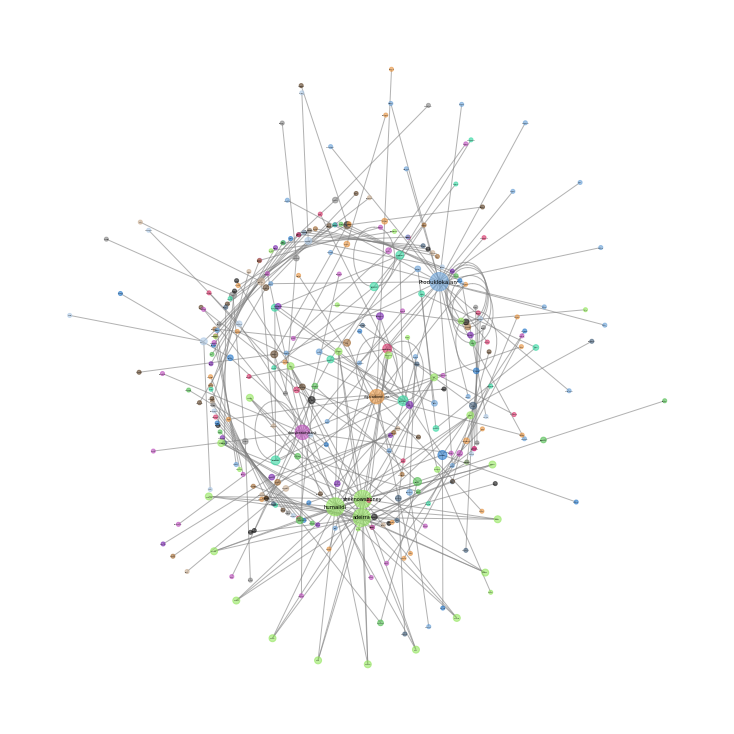

In [29]:
# Membuat fungsi komunitas
def set_node_community(G, communities):
    "'Add community to node attributes'"
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

# Membuat fungsi warna


def get_color(i, r_off=1, g_off=1, b_off=1):
    "'Assign a color to an edge'"
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i+r_off)*3) % n)/(n-1)
    g=low+span*(((i+g_off)*5)%n)/(n-1)
    b=low+span*(((i+b_off)*7)%n)/(n-1)
    return(r,g,b)

# Menetapkan komunitas untuk setiap node
communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)
community = set_node_community(G, communities)

# Menetapkan warna node
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Menetapkan dictionary nilai degree
d=dict(nx.degree_centrality(G))
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G, k=0.05)
# Memvisualisasikan jaringan
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=False,
        node_color=node_color,
        node_size=[v*5000 for v in d.values()],
        arrowstyle='->', arrowsize=20, edge_color='grey',
        font_size=9,cmap=plt.get_cmap('jet'),
        alpha=0.6,
        pos=pos)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=d[node]*80, ha='center', va='center', color="black")